In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels import robust

   age  operation_year  auxillary_node  survival_year
0   30              64               1              1
1   30              62               3              1
2   30              65               0              1
3   31              59               2              1
4   31              65               4              1
Index(['age', 'operation_year', 'auxillary_node', 'survival_year'], dtype='object')


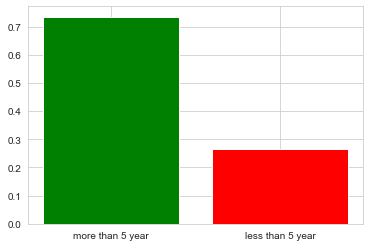

In [79]:
ds=pd.read_csv('D:\\dataset\\Haberman.csv',names=['age','operation_year','auxillary_node','survival_year'])
print(ds.head())
print(ds.columns)
temp1,temp2=(ds['survival_year'].value_counts())/len(ds)
plt.bar(['more than 5 year','less than 5 year'],[temp1,temp2],color=['green','red'])
plt.show()

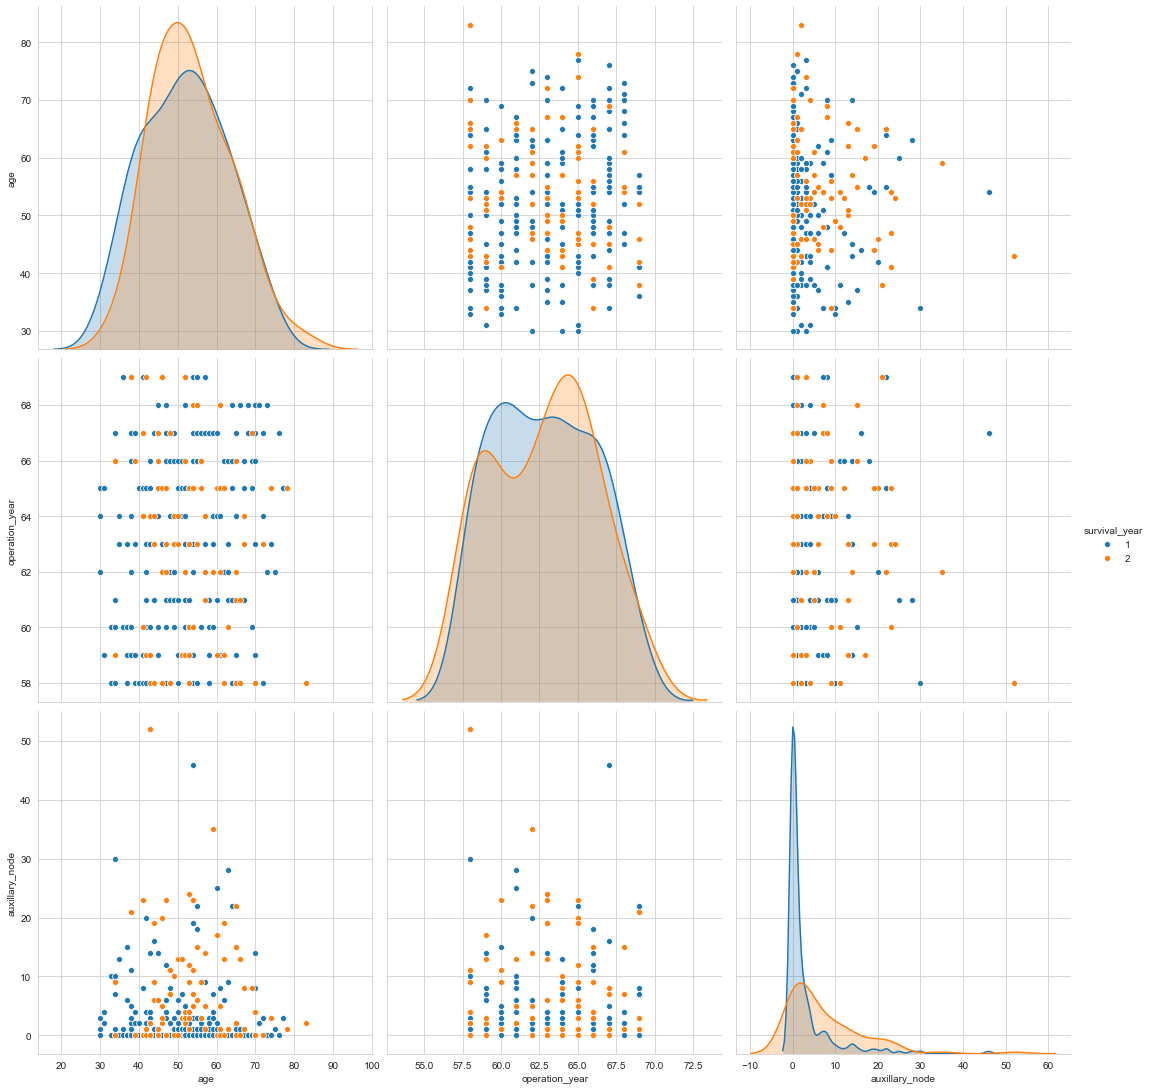

In [67]:
#pair plot
sns.set_style('whitegrid')
sns.pairplot(ds,hue='survival_year',height=5)
plt.show()

In [ ]:
'''
we can conclude that less than 40 year have less chances of getting breast cancer
'''

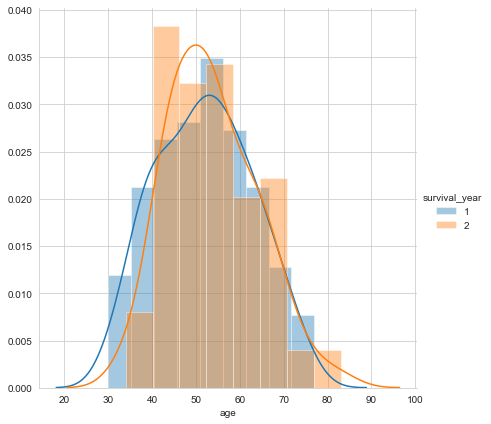

In [80]:
#making the graph of histogram and pdf
sns.FacetGrid(ds,hue='survival_year',height=6).map(sns.distplot,'age').add_legend()

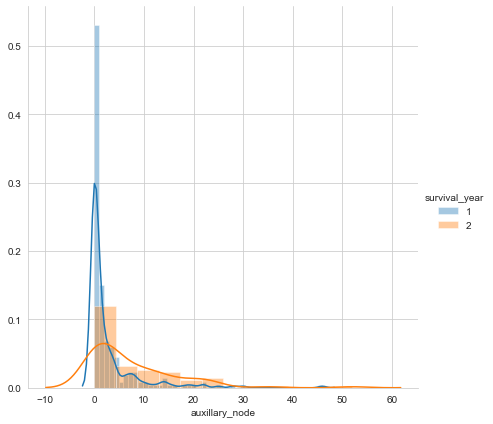

In [69]:
sns.FacetGrid(ds,hue='survival_year',height=6).map(sns.distplot,'auxillary_node').add_legend()

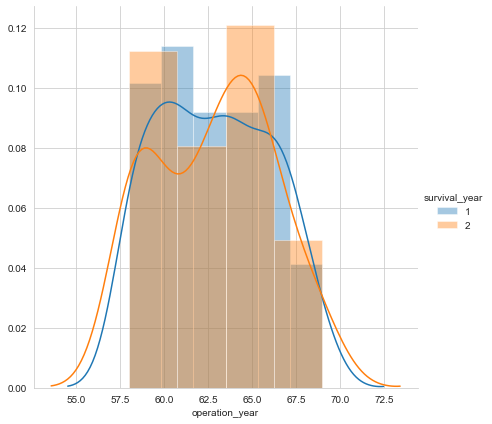

In [70]:
plt.close()
sns.FacetGrid(ds,hue='survival_year',height=6).map(sns.distplot,'operation_year').add_legend()
plt.show()

In [81]:
more_than_5=ds.loc[ds['survival_year']==1]
less_than_5=ds.loc[ds['survival_year']==2]

In [89]:
print(more_than_5.describe())
print(less_than_5.describe())

              age  operation_year  auxillary_node  survival_year
count  225.000000      225.000000      225.000000          225.0
mean    52.017778       62.862222        2.791111            1.0
std     11.012154        3.222915        5.870318            0.0
min     30.000000       58.000000        0.000000            1.0
25%     43.000000       60.000000        0.000000            1.0
50%     52.000000       63.000000        0.000000            1.0
75%     60.000000       66.000000        3.000000            1.0
max     77.000000       69.000000       46.000000            1.0
             age  operation_year  auxillary_node  survival_year
count  81.000000       81.000000       81.000000           81.0
mean   53.679012       62.827160        7.456790            2.0
std    10.167137        3.342118        9.185654            0.0
min    34.000000       58.000000        0.000000            2.0
25%    46.000000       59.000000        1.000000            2.0
50%    53.000000       63.00000

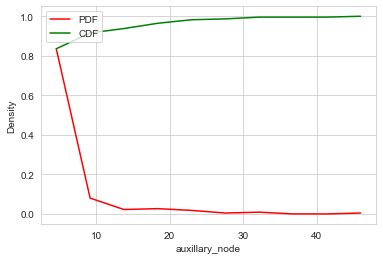

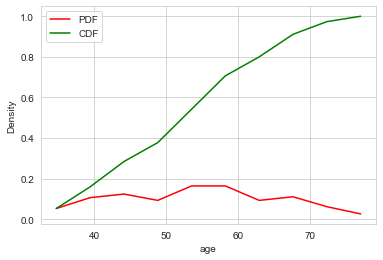

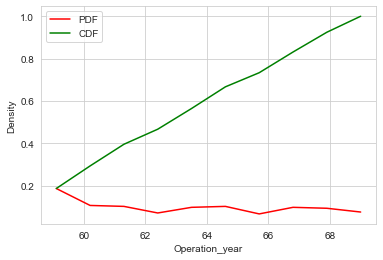

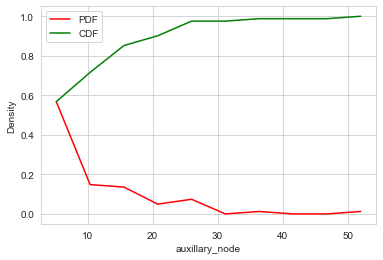

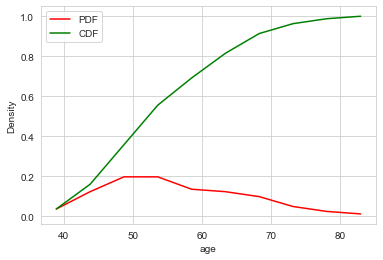

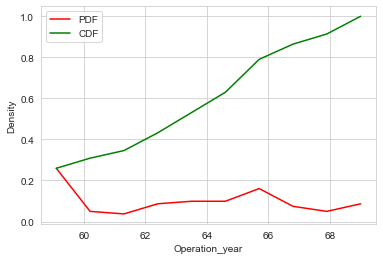

In [86]:
#now drawing PDF and CDF
arr=[more_than_5,less_than_5]
for df in arr:
    counts,bin_edges=np.histogram(df['auxillary_node'],bins=10,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF',color='r')
    plt.plot(bin_edges[1:],cdf,label='CDF',color='g')
    plt.legend(loc='upper left')
    plt.ylabel('Density')
    plt.xlabel('auxillary_node')
    plt.show()
    
    counts,bin_edges=np.histogram(df['age'],bins=10,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF',color='r')
    plt.plot(bin_edges[1:],cdf,label='CDF',color='g')
    plt.ylabel('Density')
    plt.xlabel('age')
    plt.legend(loc='upper left')
    plt.show()
    
    counts,bin_edges=np.histogram(df['operation_year'],bins=10,density=True)
    pdf=counts/sum(counts)
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF',color='r')
    plt.plot(bin_edges[1:],cdf,label='CDF',color='g')
    plt.legend(loc='upper left')
    plt.ylabel('Density')
    plt.xlabel('Operation_year')
    plt.show()

1    225
2     81
Name: survival_year, dtype: int64


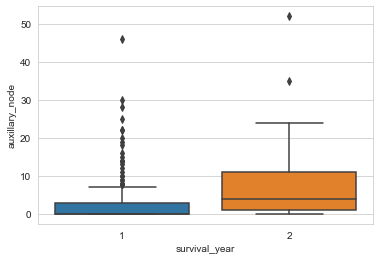

In [83]:
#ploting box plot
print(ds['survival_year'].value_counts())
sns.boxplot(x='survival_year',y='auxillary_node',data=ds)
plt.show()

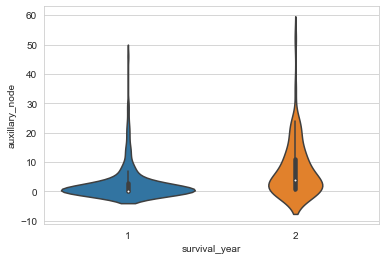

In [84]:
sns.violinplot(x='survival_year',y='auxillary_node',data=ds)
plt.show()